# PYTHON CODE FOR MULTIVARIATE DATA USING SVR

References:
1. https://scikit-learn.org/stable/modules/svm.html#regression

# Read Dataset

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [2]:
# Target: total_bedrooms
df.corr()['total_bedrooms']

longitude             0.071802
latitude             -0.069373
housing_median_age   -0.320434
total_rooms           0.928403
total_bedrooms        1.000000
population            0.881169
households            0.980920
median_income        -0.013495
median_house_value    0.045783
Name: total_bedrooms, dtype: float64

In [3]:
# Features: population, households, total_rooms
df_new = pd.DataFrame({'population': df['population'],
                       'households': df['households'],
                       'total_rooms': df['total_rooms'],
                       'bedrooms': df['total_bedrooms']})
df_new

,population,households,total_rooms,bedrooms
0,1015.0,472.0,5612.0,1283.0
1,1129.0,463.0,7650.0,1901.0
2,333.0,117.0,720.0,174.0
3,515.0,226.0,1501.0,337.0
4,624.0,262.0,1454.0,326.0
...,...,...,...,...
16995,907.0,369.0,2217.0,394.0
16996,1194.0,465.0,2349.0,528.0
16997,1244.0,456.0,2677.0,531.0
16998,1298.0,478.0,2672.0,552.0


In [4]:
X = df_new.drop(['bedrooms'], axis=1)
X

,population,households,total_rooms
0,1015.0,472.0,5612.0
1,1129.0,463.0,7650.0
2,333.0,117.0,720.0
3,515.0,226.0,1501.0
4,624.0,262.0,1454.0
...,...,...,...
16995,907.0,369.0,2217.0
16996,1194.0,465.0,2349.0
16997,1244.0,456.0,2677.0
16998,1298.0,478.0,2672.0


In [5]:
y = df_new['bedrooms']

# Plotting Dataset

In [6]:
import matplotlib.pyplot as plt

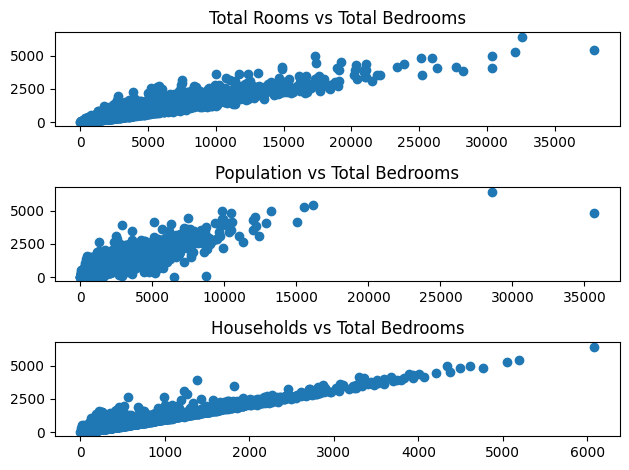

In [7]:
fig, axs = plt.subplots(3, 1)
axs[0].scatter(X['total_rooms'], y)
axs[0].set_title('Total Rooms vs Total Bedrooms')
axs[1].scatter(X['population'], y)
axs[1].set_title('Population vs Total Bedrooms')
axs[2].scatter(X['households'], y)
axs[2].set_title('Households vs Total Bedrooms')
fig.tight_layout()

# Preprocessing Dataset

In [8]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train # Dataframe

,population,households,total_rooms
9432,608.0,252.0,1280.0
13901,1773.0,615.0,4712.0
6832,2586.0,729.0,2781.0
5226,1108.0,360.0,2118.0
16888,895.0,451.0,1804.0
...,...,...,...
11284,1175.0,441.0,2376.0
11964,356.0,150.0,774.0
5390,760.0,208.0,901.0
860,3293.0,840.0,3648.0


In [10]:
y_train

9432     240.0
13901    624.0
6832     766.0
5226     374.0
16888    506.0
         ...  
11284    475.0
11964    144.0
5390     205.0
860      895.0
15795    623.0
Name: bedrooms, Length: 11390, dtype: float64

In [11]:
X_train.to_numpy() # 2 Dimension Array

array([[ 608.,  252., 1280.],
       [1773.,  615., 4712.],
       [2586.,  729., 2781.],
       ...,
       [ 760.,  208.,  901.],
       [3293.,  840., 3648.],
       [1932.,  549., 2452.]])

In [14]:
y_train.to_numpy().reshape(-1,1)

array([[240.],
       [624.],
       [766.],
       ...,
       [205.],
       [895.],
       [623.]])

# Normalize Dataset


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0,1))
X_train_sc = scaler_x.fit_transform(X_train)
X_test_sc = scaler_x.transform(X_test)

scaler_y = MinMaxScaler(feature_range=(0,1))
y_train_sc = scaler_y.fit_transform(y_train.to_numpy().reshape(-1,1))
y_test_sc =scaler_y.fit_transform(y_train.to_numpy().reshape(-1,1))

In [16]:
X_train_sc.shape

(11390, 3)

In [17]:
X_test_sc

array([[0.06886404, 0.1516198 , 0.12748122],
       [0.03223185, 0.06791646, 0.07222881],
       [0.06894812, 0.11445486, 0.09761434],
       ...,
       [0.03396956, 0.07663213, 0.06136813],
       [0.08702598, 0.22167407, 0.20390141],
       [0.02329101, 0.05476073, 0.04531435]])

In [18]:
y_train_sc

array([[0.03708876],
       [0.09667908],
       [0.11871508],
       ...,
       [0.03165736],
       [0.13873371],
       [0.0965239 ]])

# Modelling

In [19]:
from sklearn import svm

# Create regression model object
model_svr = svm.SVR(kernel = 'rbf')

# Train the model using the training sets
model_svr.fit(X_train_sc, y_train_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Testing the Model

In [20]:
y_tr_pred_sc = model_svr.predict(X_train_sc)
y_tr_pred_sc

array([0.09239262, 0.17875682, 0.17885423, ..., 0.08015575, 0.1786696 ,
       0.15418174])

In [21]:
y_tr_pred = scaler_y.inverse_transform(y_tr_pred_sc.reshape(-1,1))
y_tr_pred

array([[ 596.3780307 ],
       [1152.90894687],
       [1153.53665861],
       ...,
       [ 517.52362798],
       [1152.34687985],
       [ 994.54710044]])

In [22]:
y_te_pred_sc = model_svr.predict(X_test_sc)
y_te_pred_sc

array([0.18948744, 0.14106839, 0.16644429, ..., 0.1436942 , 0.27936872,
       0.11152328])

In [23]:
y_te_pred = scaler_y.inverse_transform(y_te_pred_sc.reshape(-1,1))
y_te_pred

array([[1222.05706182],
       [ 910.0447334 ],
       [1073.56697944],
       ...,
       [ 926.96545292],
       [1801.25200669],
       [ 719.65602027]])

In [24]:
df_train = pd.DataFrame({'population': X_train['population'],
                         'households': X_train['households'],
                         'total_rooms': X_train['total_rooms'],
                         'bedrooms': y_train,
                         'bedrooms_prediction': y_tr_pred.flatten()})
df_train

,population,households,total_rooms,bedrooms,bedrooms_prediction
9432,608.0,252.0,1280.0,240.0,596.378031
13901,1773.0,615.0,4712.0,624.0,1152.908947
6832,2586.0,729.0,2781.0,766.0,1153.536659
5226,1108.0,360.0,2118.0,374.0,772.723439
16888,895.0,451.0,1804.0,506.0,914.199015
...,...,...,...,...,...
11284,1175.0,441.0,2376.0,475.0,898.696959
11964,356.0,150.0,774.0,144.0,514.628131
5390,760.0,208.0,901.0,205.0,517.523628
860,3293.0,840.0,3648.0,895.0,1152.346880


In [25]:
df_test = pd.DataFrame({'population': X_test['population'],
                        'households': X_test['households'],
                        'total_rooms': X_test['total_rooms'],
                        'bedrooms': y_test,
                        'bedrooms_prediction': y_te_pred.flatten()})
df_test

,population,households,total_rooms,bedrooms,bedrooms_prediction
10941,2460.0,923.0,4838.0,920.0,1222.057062
5250,1153.0,414.0,2742.0,422.0,910.044733
10292,2463.0,697.0,3705.0,739.0,1073.566979
2266,3015.0,858.0,5455.0,882.0,1122.413979
6398,1144.0,362.0,1331.0,346.0,723.677610
...,...,...,...,...,...
7026,1469.0,557.0,2795.0,572.0,1038.207056
2018,2943.0,1162.0,5661.0,1287.0,1469.426035
10038,1215.0,467.0,2330.0,462.0,926.965453
16467,3108.0,1349.0,7737.0,1488.0,1801.252007


In [26]:
df_pred = pd.concat([df_train, df_test])
df_pred.sort_index(inplace=True)
df_pred

,population,households,total_rooms,bedrooms,bedrooms_prediction
0,1015.0,472.0,5612.0,1283.0,1422.333496
1,1129.0,463.0,7650.0,1901.0,1814.254827
2,333.0,117.0,720.0,174.0,502.791138
3,515.0,226.0,1501.0,337.0,599.732971
4,624.0,262.0,1454.0,326.0,620.360105
...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,814.767801
16996,1194.0,465.0,2349.0,528.0,927.445471
16997,1244.0,456.0,2677.0,531.0,938.055521
16998,1298.0,478.0,2672.0,552.0,957.414250


# Performance Evaluation Model

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Performance Evaluation on Training Data
lr_train_rms = np.sqrt(mean_squared_error(y_tr_pred,y_train))
lr_train_r2 = r2_score(y_tr_pred,y_train)
# lr_train_mae = mean_absolute_error(y_tr_pred,y_train)
# lr_train_mape = mean_absolute_percentage_error(y_tr_pred,y_train)
# lr_train_mse = mean_squared_error(y_tr_pred,y_train)

print('Root Mean Square Error: ', lr_train_rms)
# print('R2 Scored: ', lr_train_r2)
# print('Mean Absolute Error: ', lr_train_mae)
# print('Mean Absolute Percentage Error: ', lr_train_mape)
# print('Mean Square Error: ', lr_train_mse)

Root Mean Square Error:  399.34371007497253


In [28]:
# Performance Evaluation on Testing Data
lr_test_rms = np.sqrt(mean_squared_error(y_te_pred,y_test))
lr_test_r2 = r2_score(y_te_pred,y_test)
# lr_test_mae = mean_absolute_error(y_te_pred,y_test)
# lr_test_mape = mean_absolute_percentage_error(y_te_pred,y_test)
# lr_test_mse = mean_squared_error(y_te_pred,y_test)

print('Root Mean Square Error: ', lr_test_rms)
# print('R2 Scored: ', lr_test_r2)
# print('Mean Absolute Error: ', lr_test_mae)
# print('Mean Absolute Percentage Error: ', lr_test_mape)
# print('Mean Square Error: ', lr_test_mse)

Root Mean Square Error:  400.974306968098


# Plotting the Result

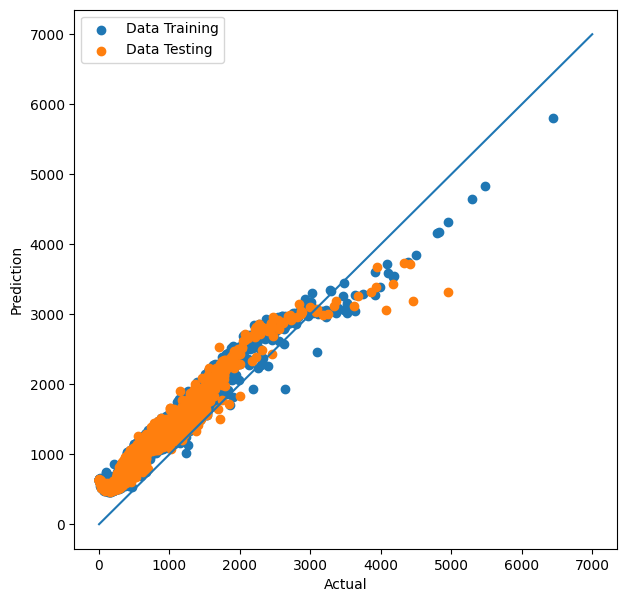

In [29]:
plt.figure(figsize=(7, 7))
plt.scatter(y_train,y_tr_pred, label='Data Training')
plt.scatter(y_test,y_te_pred, label='Data Testing')
plt.plot([1,7000],[1,7000])

plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()